In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import optimize
from math import *


In [3]:
fidas = pd.read_csv('2019 10_Données FIDAS_Test INSA.xlsx - 2019 10_Données FIDAS_Test INSA.XLS.csv')
fidas['date_begin'] = fidas['date_begin'].astype(str)
fidas['time_begin'] = fidas['time_begin'].astype(str)
fidas['timestamp'] = fidas['date_begin'] + ' ' + fidas['time_begin']
fidas['timestamp'] = pd.to_datetime(fidas['timestamp'],format='%d/%m/%Y %H:%M:%S')
fidas = fidas.drop(['date_begin','time_begin','date_end','time_end','relative time [s]','PM1','PM1_11'],axis=1)
fidas['PM10'] = fidas['PM10'].str.replace(',','.').astype(float)
fidas['PM2.5'] = fidas['PM2.5'].str.replace(',','.').astype(float)
fidas = fidas.dropna(axis=0)
fidas.set_index('timestamp',inplace=True)


In [3]:
fidas

,PM2.5,PM10
timestamp,,
2019-10-03 23:59:11,3.52,5.29
2019-10-04 00:00:11,3.53,4.66
2019-10-04 00:01:11,3.54,6.74
2019-10-04 00:02:11,3.55,11.76
2019-10-04 00:03:11,3.56,6.46
...,...,...
2019-10-16 16:04:51,3.07,6.62
2019-10-16 16:06:17,2.72,4.37
2019-10-16 16:06:51,2.45,3.08


In [4]:
data = pd.read_csv('MESUR_6 (1).TXT', delimiter=';',parse_dates=True)
data['date_begin'] = data['date_begin'].astype(str)
data['time_begin'] = data['time_begin'].astype(str)
data['timestamp'] = data['date_begin'] + ' ' + data['time_begin']
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d %H:%M:%S')
data = data.drop(['date_begin','time_begin','Numéro du noeud','énergie','NO2_brute','PM1','PM1_std'],axis=1)
data.set_index('timestamp',inplace=True)

In [5]:
data.head()

,temp,hum,PM2.5,PM10,PM2.5_std,PM10_std,latitude,longitude
timestamp,,,,,,,,
2019-10-03 22:00:11,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:00:31,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:00:51,22.2,37.8,9,13,9,13,45.649718,4.833387
2019-10-03 22:01:11,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:01:31,22.2,37.8,7,10,7,10,45.649718,4.833387


In [6]:
dates = list(data.index.strftime("%Y-%m-%d").unique())
print(dates)

['2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08']


C:\Users\zarro\AppData\Local\Temp\ipykernel_22660\3832452615.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


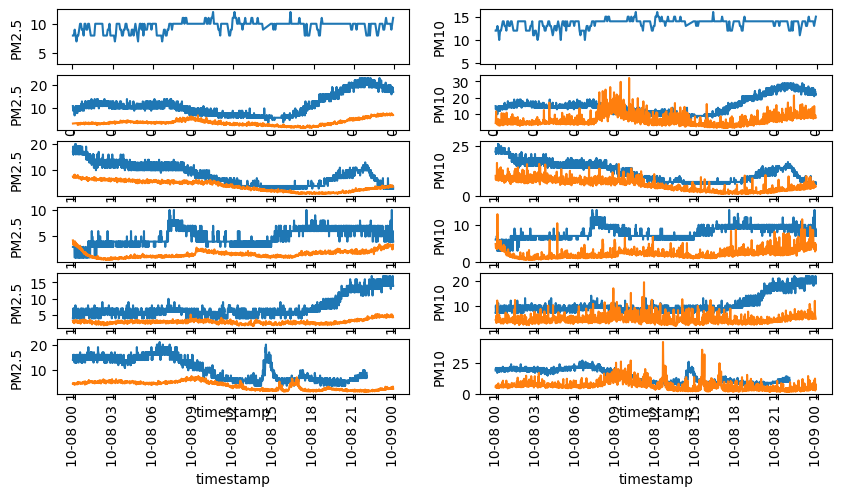

In [7]:
plt.figure(figsize=(10,5))
PM = ['PM2.5','PM10']
for i in range (len(dates)):
    for j,pm in enumerate(PM):
        dt = data[data.index.date == datetime.strptime(dates[i],'%Y-%m-%d').date()]
        fd = fidas[fidas.index.date == datetime.strptime(dates[i],'%Y-%m-%d').date()]
        plt.subplot(len(dates), len(PM), i*len(PM) + j +1)
        plt.plot(dt.index,dt[pm],label=f'{pm} on {dates[i]}')
        plt.plot(fd.index,fd[pm],label=f'fidas {pm} on {dates[i]}')
        plt.xlabel('timestamp')
        plt.ylabel(f'{pm}')
        # plt.legend()
        plt.xticks(rotation=90)
# plt.legend()
plt.tight_layout()
plt.show()
    

In [8]:
merged_data = pd.merge(fidas,data,on='timestamp',how='inner',suffixes=('_fidas','_sensor'))
merged_data = merged_data.drop(merged_data.index[merged_data.index.date == datetime.strptime('2019-10-07','%Y-%m-%d').date()])
merged_data

,PM2.5_fidas,PM10_fidas,temp,hum,PM2.5_sensor,PM10_sensor,PM2.5_std,PM10_std,latitude,longitude
timestamp,,,,,,,,,,
2019-10-04 21:19:12,5.59,8.21,22.0,47.7,20,26,20,26,45.649430,4.833355
2019-10-04 21:30:12,5.81,10.86,22.0,47.6,23,29,23,29,45.649562,4.833577
2019-10-04 21:41:12,5.91,9.84,22.0,47.5,22,28,22,28,45.649632,4.833328
2019-10-04 21:52:12,5.66,6.80,21.9,47.6,22,28,22,28,45.649318,4.833393
2019-10-04 22:39:12,7.06,9.08,21.8,47.3,19,25,19,25,45.649505,4.833333
...,...,...,...,...,...,...,...,...,...,...
2019-10-08 10:15:11,5.51,9.71,22.1,43.7,11,15,11,15,45.649580,4.833338
2019-10-08 10:16:11,5.28,8.46,22.1,43.7,10,14,10,14,45.649585,4.833178
2019-10-08 10:17:11,5.56,7.97,22.1,43.6,10,14,10,14,45.649500,4.833248


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

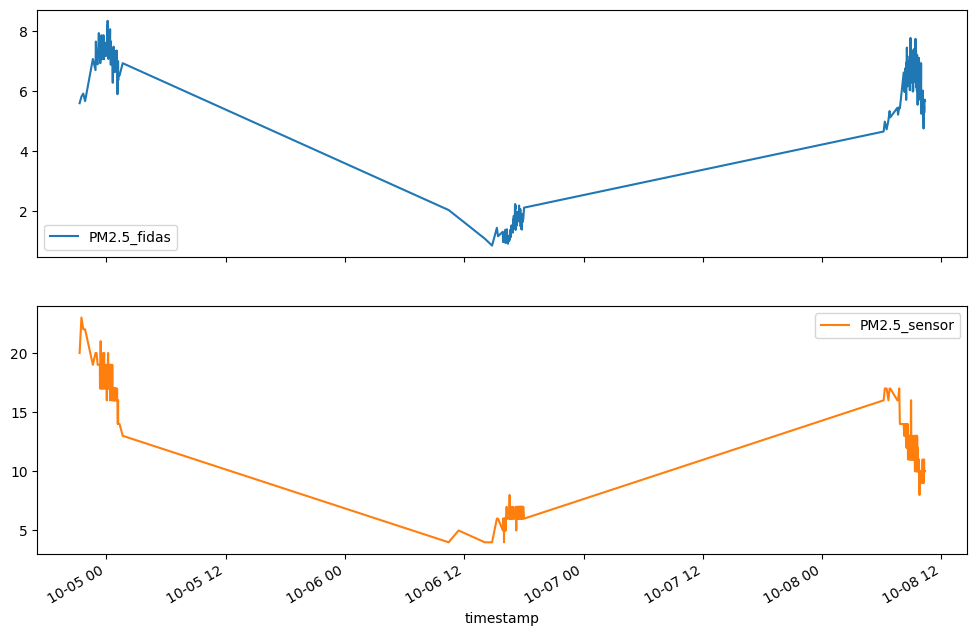

In [9]:
merged_data[['PM2.5_fidas','PM2.5_sensor']].plot(subplots=True,figsize=(12,8))


In [10]:
date = list(merged_data.index.strftime("%Y-%m-%d").unique())
print(len(date))

4


             PM10_fidas  PM10_sensor
PM10_fidas      1.00000      0.54307
PM10_sensor     0.54307      1.00000


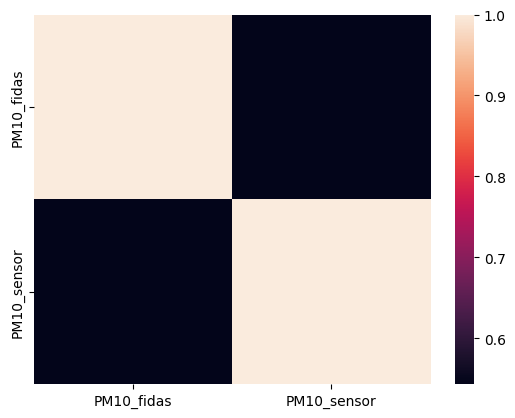

In [11]:
mg = merged_data[['PM10_fidas','PM10_sensor']]
correlation_PM10 = mg.corr(method='pearson')
sns.heatmap(correlation_PM10)
print(correlation_PM10)

correlation of PM10 for 2019-10-04:
              PM10_fidas  PM10_sensor
PM10_fidas     1.000000     0.020213
PM10_sensor    0.020213     1.000000
correlation of PM10 for 2019-10-05:
              PM10_fidas  PM10_sensor
PM10_fidas     1.000000     0.168799
PM10_sensor    0.168799     1.000000
correlation of PM10 for 2019-10-06:
              PM10_fidas  PM10_sensor
PM10_fidas       1.0000       0.1146
PM10_sensor      0.1146       1.0000
correlation of PM10 for 2019-10-08:
              PM10_fidas  PM10_sensor
PM10_fidas     1.000000    -0.265496
PM10_sensor   -0.265496     1.000000


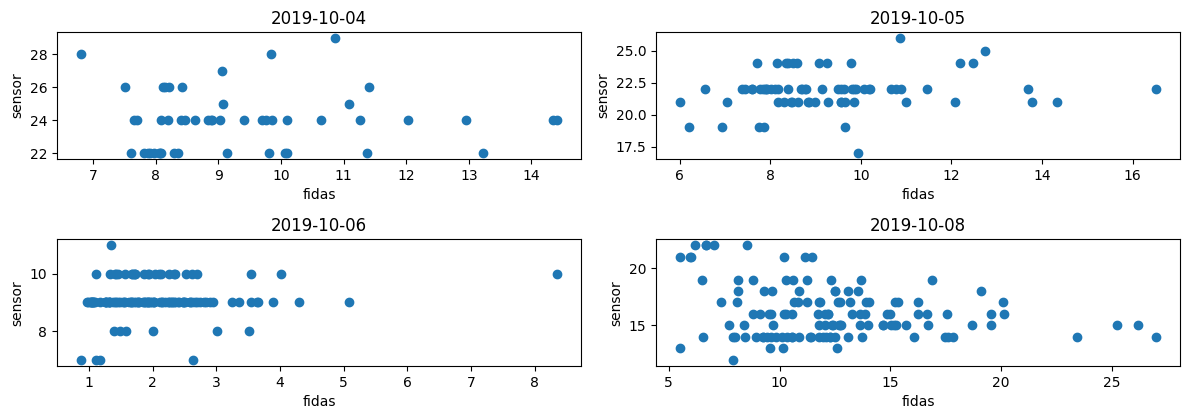

In [12]:
plt.figure(figsize=(12,8))
for i in range(len(date)):
    mgd = merged_data[merged_data.index.date == datetime.strptime(date[i],'%Y-%m-%d').date()]
    corr = mgd[['PM10_fidas','PM10_sensor']].corr(method='pearson')
    print(f'correlation of PM10 for {date[i]}:\n',corr)
    plt.subplot(len(date),2,i+1)
    plt.scatter(mgd['PM10_fidas'],mgd['PM10_sensor'])
    plt.xlabel('fidas')
    plt.ylabel('sensor')
    plt.title(f'{date[i]}')
plt.tight_layout()
plt.show()


              PM2.5_fidas  PM2.5_sensor
PM2.5_fidas       1.00000       0.85893
PM2.5_sensor      0.85893       1.00000


<Axes: >

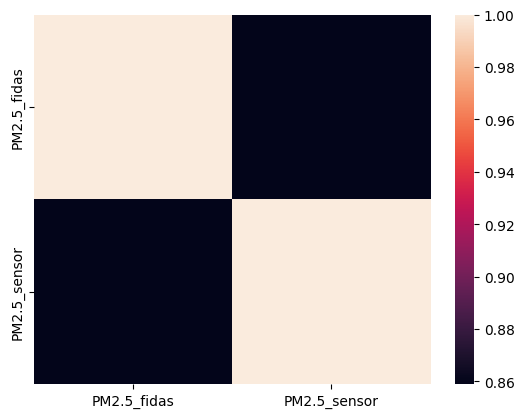

In [13]:
mg = merged_data[['PM2.5_fidas','PM2.5_sensor']]
correlation_PM2_5 = mg.corr(method='pearson')
print(correlation_PM2_5)
sns.heatmap(correlation_PM2_5)

              PM2.5_fidas  PM2.5_sensor
PM2.5_fidas      1.000000     -0.553851
PM2.5_sensor    -0.553851      1.000000
              PM2.5_fidas  PM2.5_sensor
PM2.5_fidas      1.000000      0.512485
PM2.5_sensor     0.512485      1.000000
              PM2.5_fidas  PM2.5_sensor
PM2.5_fidas      1.000000      0.200327
PM2.5_sensor     0.200327      1.000000
              PM2.5_fidas  PM2.5_sensor
PM2.5_fidas      1.000000     -0.187787
PM2.5_sensor    -0.187787      1.000000


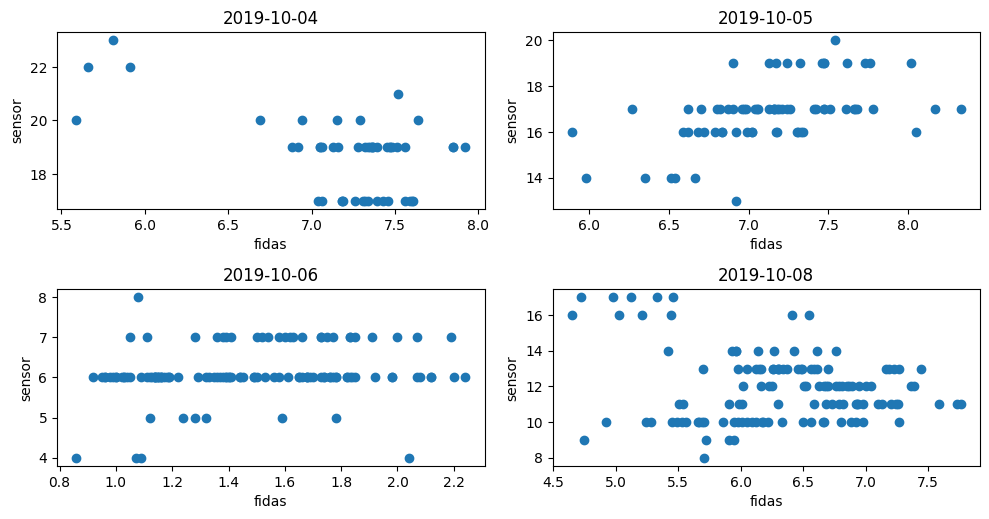

In [14]:
plt.figure(figsize=(10,10))
for i in range(len(date)):
    mgd = merged_data[merged_data.index.date == datetime.strptime(date[i],'%Y-%m-%d').date()]
    corr = mgd[['PM2.5_fidas','PM2.5_sensor']].corr(method='pearson')
    print(corr)
    plt.subplot(len(date),2,i+1)
    plt.scatter(mgd['PM2.5_fidas'],mgd['PM2.5_sensor'])
    plt.xlabel('fidas')
    plt.ylabel('sensor')
    plt.title(f'{date[i]}')
plt.tight_layout()
plt.show()
    


* Données horaire

In [15]:
data_hourly = data.resample('H').mean() #données par heure
fidas_hourly = fidas.resample('H').mean() #données par heure
print(fidas_hourly.shape)
print(data_hourly.shape)

(306, 2)
(120, 8)


In [16]:
data

,temp,hum,PM2.5,PM10,PM2.5_std,PM10_std,latitude,longitude
timestamp,,,,,,,,
2019-10-03 22:00:11,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:00:31,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:00:51,22.2,37.8,9,13,9,13,45.649718,4.833387
2019-10-03 22:01:11,22.2,37.8,8,12,8,12,45.649718,4.833387
2019-10-03 22:01:31,22.2,37.8,7,10,7,10,45.649718,4.833387
...,...,...,...,...,...,...,...,...
2019-10-08 21:58:25,23.3,40.1,7,10,7,10,45.649670,4.833452
2019-10-08 21:58:45,23.3,40.1,7,10,7,10,45.649790,4.833285
2019-10-08 21:59:05,23.3,40.1,8,12,8,12,45.649862,4.833238


In [17]:
merged_hourly = pd.merge(data_hourly,fidas_hourly,on='timestamp',how='inner',suffixes=('_sensor','_fidas'))
merged_hourly

,temp,hum,PM2.5_sensor,PM10_sensor,PM2.5_std,PM10_std,latitude,longitude,PM2.5_fidas,PM10_fidas
timestamp,,,,,,,,,,
2019-10-03 23:00:00,21.822093,37.386047,9.848837,13.843023,9.848837,13.843023,44.853398,4.748940,3.520000,5.290000
2019-10-04 00:00:00,21.508889,36.739444,10.127778,14.133333,10.127778,14.133333,45.649619,4.833232,3.553000,5.349333
2019-10-04 01:00:00,21.268333,36.788333,11.755556,15.850000,11.755556,15.850000,45.649620,4.833151,3.564500,4.813500
2019-10-04 02:00:00,21.111111,37.466667,11.788889,15.844444,11.788889,15.844444,45.649617,4.833210,3.671333,4.612833
2019-10-04 03:00:00,20.985556,37.572222,10.638889,14.644444,10.638889,14.644444,45.649647,4.833193,4.135833,5.049500
...,...,...,...,...,...,...,...,...,...,...
2019-10-08 17:00:00,24.006667,40.871111,7.277778,10.561111,7.277778,10.561111,45.649697,4.833156,2.301667,4.387667
2019-10-08 18:00:00,23.764444,40.065556,6.111111,9.116667,6.111111,9.116667,45.649467,4.833210,2.310000,4.763000
2019-10-08 19:00:00,23.646667,38.362778,5.727778,8.727778,5.727778,8.727778,45.649694,4.833033,2.765000,4.778667


correlation between sensor and fidas for PM2_5 is:
               PM2.5_fidas  PM2.5_sensor
PM2.5_fidas      1.000000      0.762252
PM2.5_sensor     0.762252      1.000000


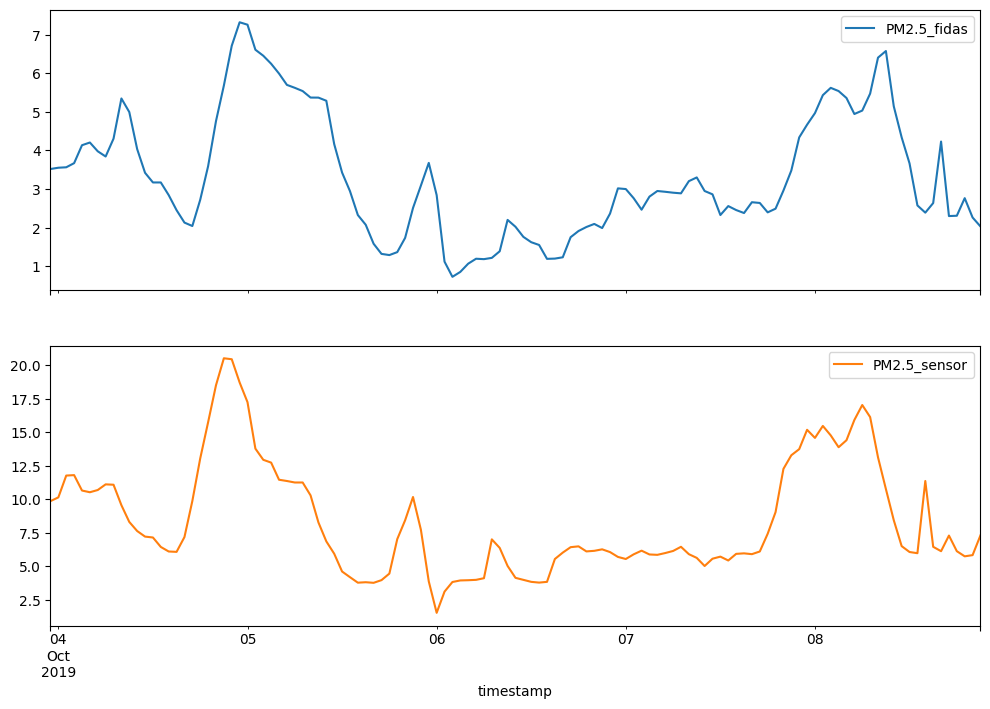

In [18]:
merged_hourly[['PM2.5_fidas','PM2.5_sensor']].plot(subplots=True,figsize=(12,8))
corr_PM2_5 = merged_hourly[['PM2.5_fidas','PM2.5_sensor']].corr(method='pearson')
print('correlation between sensor and fidas for PM2_5 is:\n',corr_PM2_5)

correlation between sensor and fidas for PM10 is:
              PM10_fidas  PM10_sensor
PM10_fidas     1.000000     0.582426
PM10_sensor    0.582426     1.000000


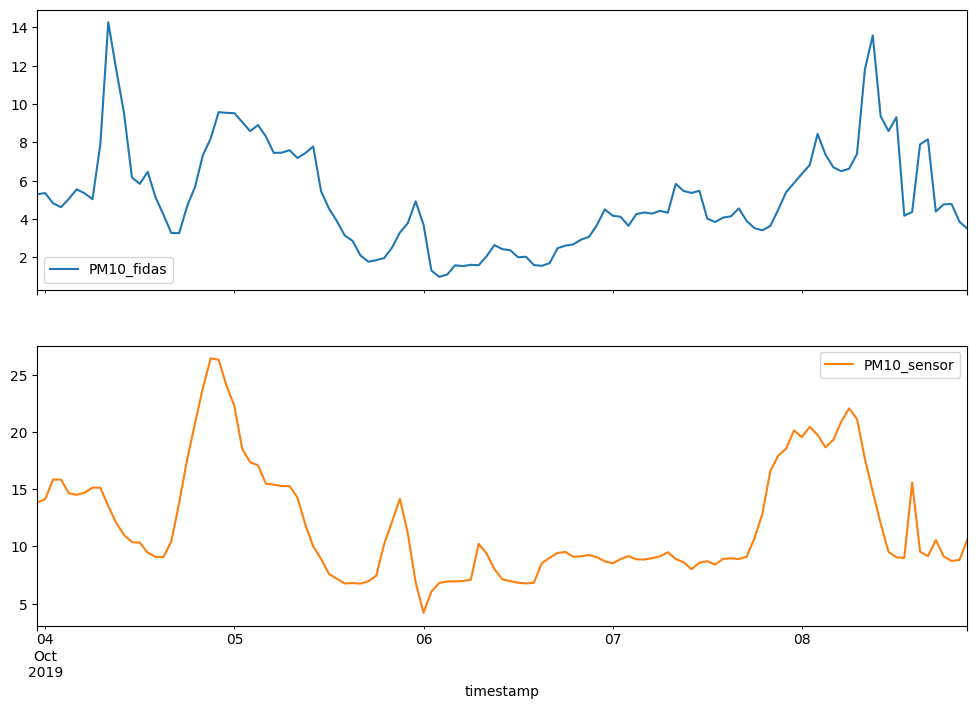

In [19]:
merged_hourly[['PM10_fidas','PM10_sensor']].plot(subplots=True,figsize=(12,8))
corr_PM10 = merged_hourly[['PM10_fidas','PM10_sensor']].corr(method='pearson')
print('correlation between sensor and fidas for PM10 is:\n',corr_PM10)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [21]:
x = (merged_hourly['PM10_fidas'] - merged_hourly['PM10_fidas'].min()) / (merged_hourly['PM10_fidas'].max() - merged_hourly['PM10_fidas'].min())
y = (merged_hourly['PM10_sensor'] - merged_hourly['PM10_sensor'].min()) / (merged_hourly['PM10_sensor'].max() - merged_hourly['PM10_sensor'].min())

In [22]:
x1 = (merged_hourly['PM10_fidas'] - merged_hourly['PM10_fidas'].min()) / (merged_hourly['PM10_fidas'].max() - merged_hourly['PM10_fidas'].min())
y1 = (merged_hourly['PM10_sensor'] - merged_hourly['PM10_sensor'].min()) / (merged_hourly['PM10_sensor'].max() - merged_hourly['PM10_sensor'].min())

In [23]:
mae_PM2_5 = mean_absolute_error(merged_hourly['PM2.5_fidas'],merged_hourly['PM2.5_sensor'])
mae_PM10 = mean_absolute_error(x,y)
print(f"MAE for PM10: {mae_PM10}")
print(f"MAE for PM2_5: {mae_PM2_5}")

MAE for PM10: 0.15088214227742514
MAE for PM2_5: 5.082239747610038


In [24]:
mse_PM2_5 = mean_squared_error(merged_hourly['PM2.5_fidas'],merged_hourly['PM2.5_sensor'])
mse_PM10 = mean_squared_error(x,y)
print(f"MSE for PM10: {mse_PM10}")
print(f"MSE for PM2_5: {mse_PM2_5}")

MSE for PM10: 0.03903259903449161
MSE for PM2_5: 35.29072656998932


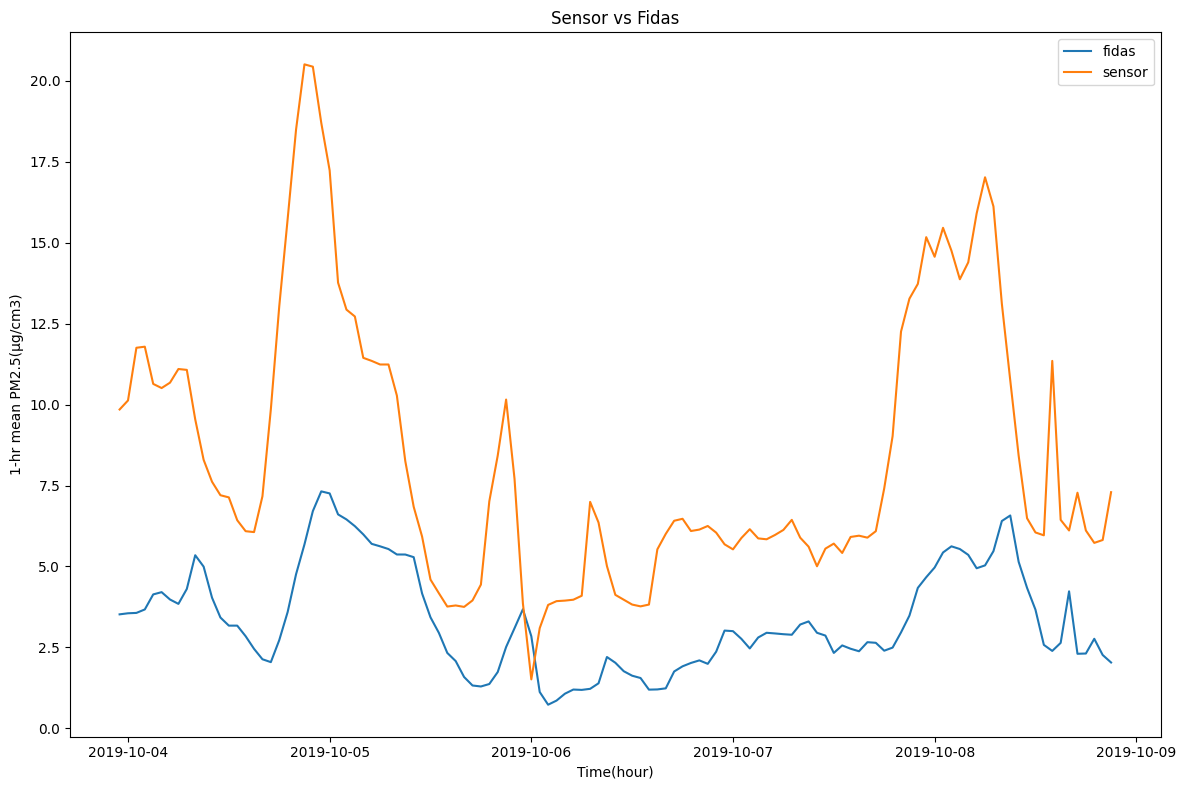

In [25]:
plt.figure(figsize=(12,8))
plt.plot(merged_hourly.index,merged_hourly['PM2.5_fidas'],label='fidas')
plt.plot(merged_hourly.index,merged_hourly['PM2.5_sensor'],label='sensor')
plt.legend()
plt.xlabel('Time(hour)')
plt.ylabel('1-hr mean PM2.5(µg/cm3)')
plt.title('Sensor vs Fidas')
plt.tight_layout()
plt.show()


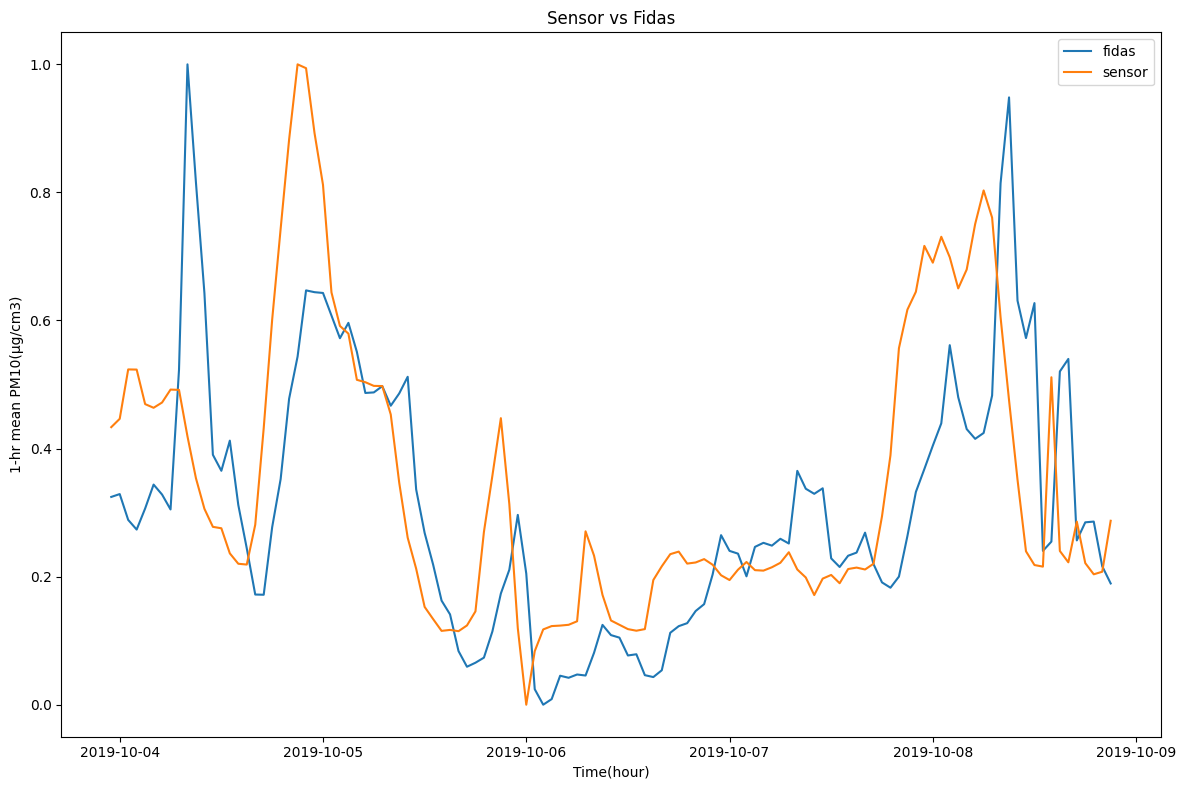

In [26]:
plt.figure(figsize=(12,8))
plt.plot(merged_hourly.index,x,label='fidas')
plt.plot(merged_hourly.index,y,label='sensor')
plt.legend()
plt.xlabel('Time(hour)')
plt.ylabel('1-hr mean PM10(µg/cm3)')
plt.title('Sensor vs Fidas')
plt.tight_layout()
plt.show()

In [27]:
merged_hourly[['PM2.5_fidas','PM2.5_sensor']].corr(method='pearson')

,PM2.5_fidas,PM2.5_sensor
PM2.5_fidas,1.000000,0.762252
PM2.5_sensor,0.762252,1.000000


In [28]:
model=LinearRegression()
X = merged_hourly['PM2.5_sensor'].values.reshape(-1,1)
y = merged_hourly['PM2.5_fidas'].values.reshape(-1,1)
model.fit(X,y)
R_2 = model.score(X,y)
prediction = model.predict(X)


In [29]:
def f(x,a,b):
    return a*x + b

In [30]:
params, param_cov = optimize.curve_fit(f,merged_hourly['PM2.5_sensor'],merged_hourly['PM2.5_fidas'])

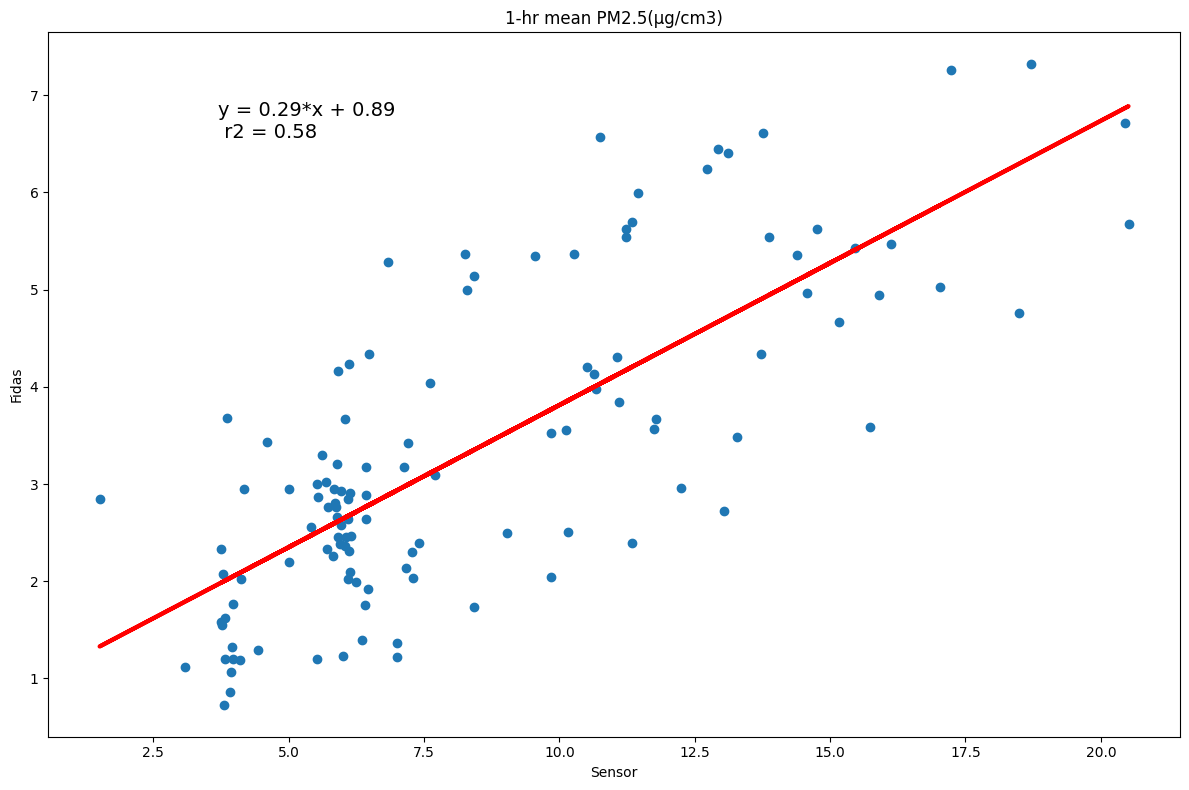

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(merged_hourly['PM2.5_sensor'],merged_hourly['PM2.5_fidas'])
plt.plot(merged_hourly['PM2.5_sensor'],f(merged_hourly['PM2.5_sensor'],params[0],params[1]),c='r',lw=3)
plt.text(0.15, 0.85, f'y = {params[0]:.2f}*x + {params[1]:.2f}\n r2 = {R_2:.2f}', fontsize=14, transform=plt.gca().transAxes)
plt.xlabel('Sensor')
plt.ylabel('Fidas')
plt.title('1-hr mean PM2.5(µg/cm3)')
plt.tight_layout()
plt.show()

PM10

In [32]:
model=LinearRegression()
X = merged_hourly['PM10_sensor'].values.reshape(-1,1)
y = merged_hourly['PM10_fidas'].values.reshape(-1,1)
model.fit(X,y)
R_2 = model.score(X,y)
prediction = model.predict(X)

In [33]:
params, param_cov = optimize.curve_fit(f,merged_hourly['PM10_sensor'],merged_hourly['PM10_fidas'])

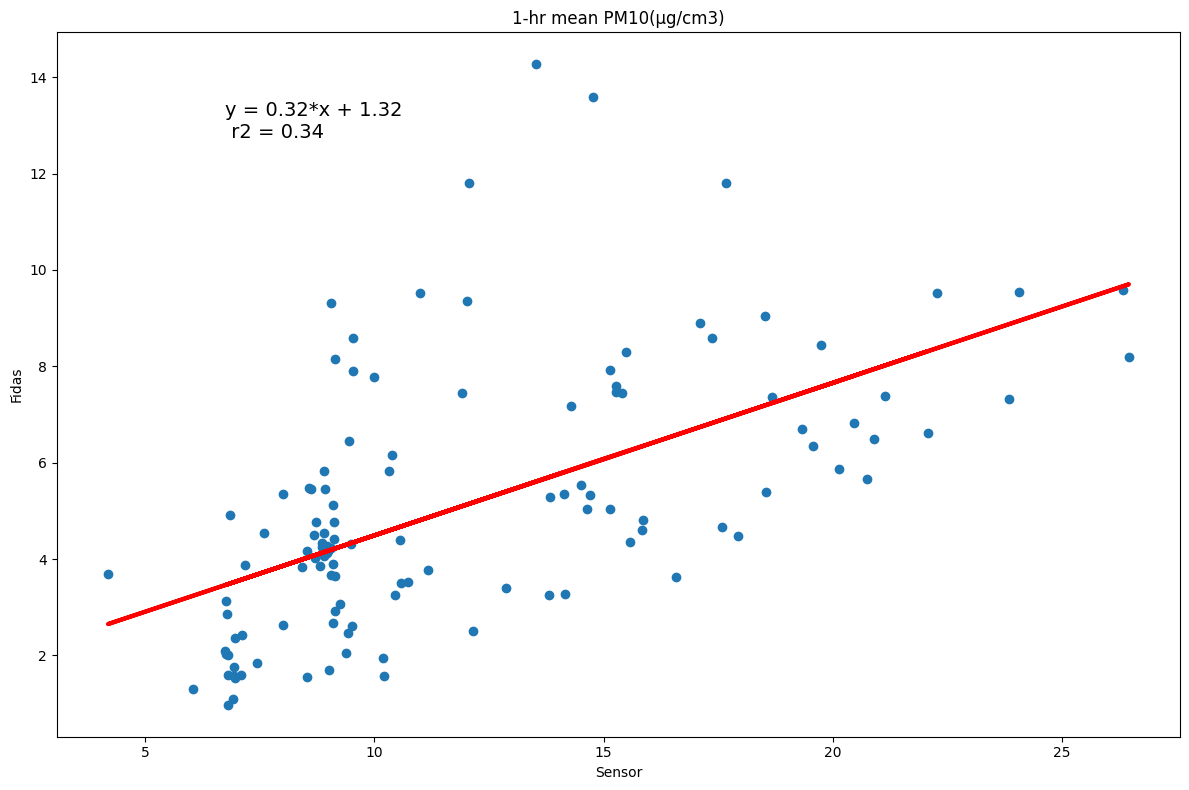

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(merged_hourly['PM10_sensor'],merged_hourly['PM10_fidas'])
plt.plot(merged_hourly['PM10_sensor'],f(merged_hourly['PM10_sensor'],params[0],params[1]),c='r',lw=3)
plt.text(0.15, 0.85, f'y = {params[0]:.2f}*x + {params[1]:.2f}\n r2 = {R_2:.2f}', fontsize=14, transform=plt.gca().transAxes)
plt.xlabel('Sensor')
plt.ylabel('Fidas')
plt.title('1-hr mean PM10(µg/cm3)')
plt.tight_layout()
plt.show()

In [35]:
sqrt(mse_PM10)

0.19756669515505798